In [33]:
# Import default_timer to compute durations
from timeit import default_timer as timer
Debut=timer() # start time

import numpy as np # import numpy library
import pandas as pd # importing pandas library

# scrapping file paths
from glob import glob

# Allows the use of display() for DataFrames
from IPython.display import display 

from matplotlib import pyplot as plt # import matplot. pyplot to allow figure's plotting
#plt.style.use('bmh') # for better plots

import os

In [34]:
# scrapping data files path
DF_paths_list_train = sorted(glob("./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/*"))
display(DF_paths_list_train)


DF_paths_list_test = sorted(glob("./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/*"))
display(DF_paths_list_test)

['./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/body_acc_x_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/body_acc_y_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/body_acc_z_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/body_gyro_x_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/body_gyro_y_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/body_gyro_z_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/total_acc_x_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/total_acc_y_train.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/total_acc_z_train.txt']

['./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/body_acc_x_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/body_acc_y_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/body_acc_z_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/body_gyro_x_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/body_gyro_y_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/body_gyro_z_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/total_acc_x_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/total_acc_y_test.txt',
 './Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/total_acc_z_test.txt']

In [35]:
"""""
import re

all_files = sorted(glob("./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/*.txt"), )
li = []
columns = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None, delim_whitespace=True)
    df = df.reset_index()
    print(df.shape)
    print(df.head())
    df = pd.melt(df,id_vars="index")
    print(df.shape)
    print(df.head())
    li.append(df)
    column = re.split(r'\.', filename.split('/')[-1])[0]
    columns.append(column)
    #print(column, df.shape)

df = pd.concat(li, axis=1, ignore_index=True)

#df.columns = columns

#df.shape
df.info()
#df.head()
"""


'""\nimport re\n\nall_files = sorted(glob("./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/*.txt"), )\nli = []\ncolumns = []\n\nfor filename in all_files:\n    df = pd.read_csv(filename, index_col=None, header=None, delim_whitespace=True)\n    df = df.reset_index()\n    print(df.shape)\n    print(df.head())\n    df = pd.melt(df,id_vars="index")\n    print(df.shape)\n    print(df.head())\n    li.append(df)\n    column = re.split(r\'\\.\', filename.split(\'/\')[-1])[0]\n    columns.append(column)\n    #print(column, df.shape)\n\ndf = pd.concat(li, axis=1, ignore_index=True)\n\n#df.columns = columns\n\n#df.shape\ndf.info()\n#df.head()\n'

In [36]:
import re
import pandas as pd

y_labels = pd.read_csv('./Data/Original-Data/UCI-HAR-Dataset/activity_labels.txt', index_col=None, header=None, delim_whitespace=True, names=['y_id', 'y_label'])
print(y_labels.head(6))

def loadData(X_path, y_path):
    y_data = pd.read_csv(y_path, index_col=None, header=None, names=['y_id'])
    y_data = y_data.reset_index()
    y_data = y_data.rename(columns={'index': 'y_index'})
    X_files = sorted(glob(X_path))
    X_data = pd.DataFrame()
    for i, X_file in enumerate(X_files):
        df = pd.DataFrame()
        filename = re.split(r'\.', X_file.split('/')[-1])[0]
        f = open(X_file, "r")
        lines = f.readlines()
        processedList = []
        for j, line in enumerate(lines):
            try:
                line = line.split()
                for k in range(len(line)):
                    if (i == 0):
                        processedList.append([j,line[k]])
                    else:
                        processedList.append(line[k])
            except:
                print('Error at line number: ', j)
        if (i == 0):
            df = pd.DataFrame(data = processedList, columns=['y_index', filename])
            df[filename] = pd.to_numeric(df[filename])
            X_data = df
        else:
            df = pd.DataFrame(data = processedList, columns=[filename])
            df[filename] = pd.to_numeric(df[filename])
            X_data = pd.concat([X_data, df], axis=1, join='outer')
    X_data = pd.merge(X_data, y_data, left_on='y_index', right_index=True, how='left')
    X_data = pd.merge(X_data, y_labels, left_on='y_id', right_on='y_id', how='left')
    #X_data = X_data.drop(['y_index_x', 'y_index_y', 'y_id_x'], axis=1)
    return X_data

data_train = loadData("./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/train/*.txt", "./Data/Original-Data/UCI-HAR-Dataset/y_train.txt")
data_test = loadData("./Data/Original-Data/UCI-HAR-Dataset/Inertial-Signals/test/*.txt", "./Data/Original-Data/UCI-HAR-Dataset/y_test.txt")

   y_id             y_label
0     1             WALKING
1     2    WALKING_UPSTAIRS
2     3  WALKING_DOWNSTAIRS
3     4             SITTING
4     5            STANDING
5     6              LAYING


In [37]:
print(data_train.shape)
print(data_train.iloc[126:130])
print(data_train.info())
data_train.head()

(941056, 13)
     y_index_x  body_acc_x_train  body_acc_y_train  body_acc_z_train  \
126          0         -0.000222          0.001574          0.002381   
127          0          0.001576          0.003070         -0.002270   
128          1          0.001094         -0.004688         -0.026860   
129          1          0.004550         -0.007488         -0.025098   

     body_gyro_x_train  body_gyro_y_train  body_gyro_z_train  \
126           0.037449          -0.000080          -0.005643   
127           0.028818          -0.000038          -0.001446   
128           0.017111           0.006123           0.012268   
129           0.024179           0.009710           0.016150   

     total_acc_x_train  total_acc_y_train  total_acc_z_train  y_index_y  y_id  \
126           1.019372          -0.122745           0.099874          0     5   
127           1.021171          -0.121326           0.094987          0     5   
128           1.018851          -0.123976           0.097930  

,y_index_x,body_acc_x_train,body_acc_y_train,body_acc_z_train,body_gyro_x_train,body_gyro_y_train,body_gyro_z_train,total_acc_x_train,total_acc_y_train,total_acc_z_train,y_index_y,y_id,y_label
0,0,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934,0,5,STANDING
1,0,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316,1.022833,-0.126876,0.105687,0,5,STANDING
2,0,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250,1.022028,-0.124004,0.102102,0,5,STANDING
3,0,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751,1.017877,-0.124928,0.106553,0,5,STANDING
4,0,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553,1.023680,-0.125767,0.102814,0,5,STANDING


In [38]:
print(data_test.shape)
print(data_test.iloc[126:130])
print(data_test.info())
data_train.head()

(377216, 13)
     y_index_x  body_acc_x_test  body_acc_y_test  body_acc_z_test  \
126          0         0.001470         0.009517         0.004042   
127          0         0.002574         0.007305         0.004888   
128          1         0.009280         0.006651        -0.026319   
129          1         0.004930         0.018650        -0.026888   

     body_gyro_x_test  body_gyro_y_test  body_gyro_z_test  total_acc_x_test  \
126         -0.020432         -0.072973          0.027008          0.993241   
127         -0.029997         -0.070649          0.030546          0.994391   
128          0.170288         -0.061374          0.055096          0.999192   
129          0.175222         -0.095364          0.043344          0.994679   

     total_acc_y_test  total_acc_z_test  y_index_y  y_id   y_label  
126         -0.262064          0.144703          0     5  STANDING  
127         -0.264135          0.145494          0     5  STANDING  
128         -0.264935          0.12561

,y_index_x,body_acc_x_train,body_acc_y_train,body_acc_z_train,body_gyro_x_train,body_gyro_y_train,body_gyro_z_train,total_acc_x_train,total_acc_y_train,total_acc_z_train,y_index_y,y_id,y_label
0,0,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934,0,5,STANDING
1,0,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316,1.022833,-0.126876,0.105687,0,5,STANDING
2,0,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250,1.022028,-0.124004,0.102102,0,5,STANDING
3,0,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751,1.017877,-0.124928,0.106553,0,5,STANDING
4,0,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553,1.023680,-0.125767,0.102814,0,5,STANDING


Training Data 



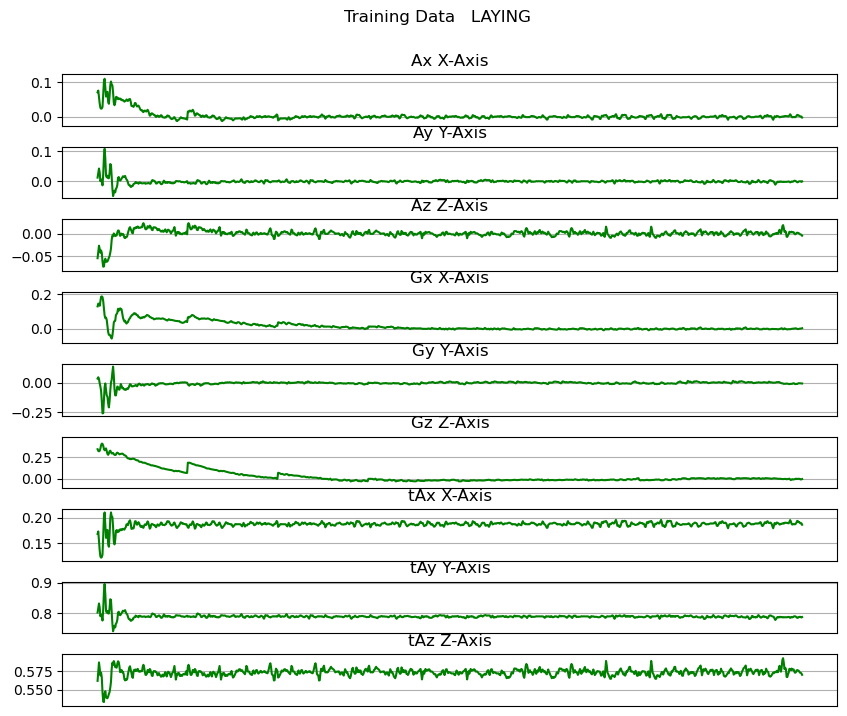

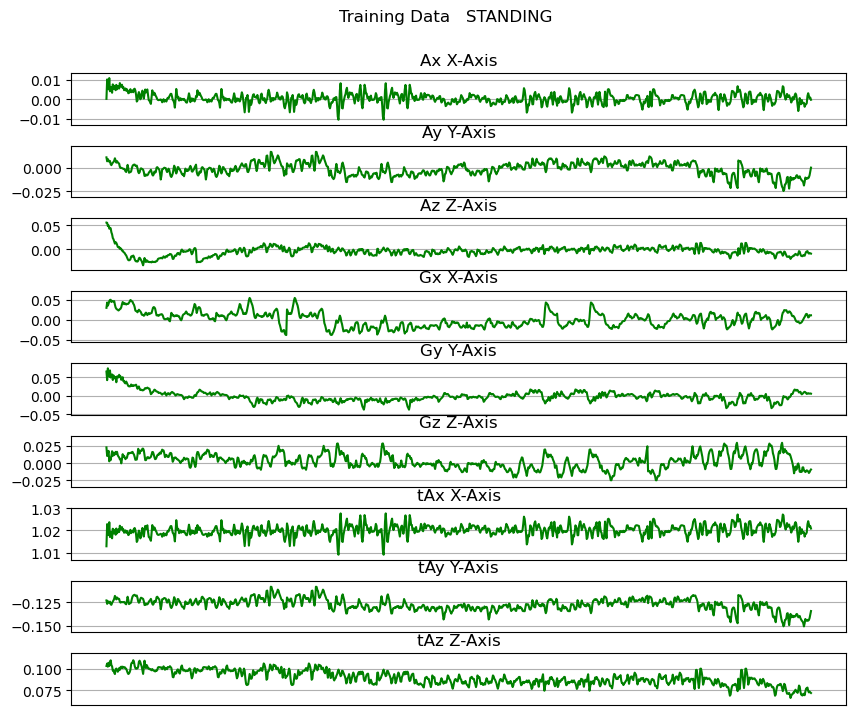

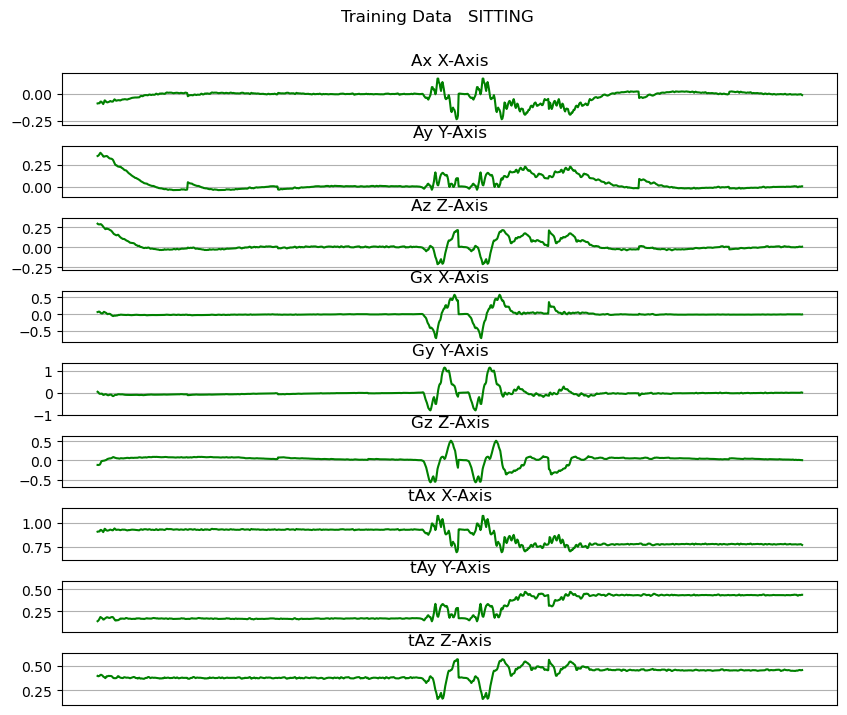

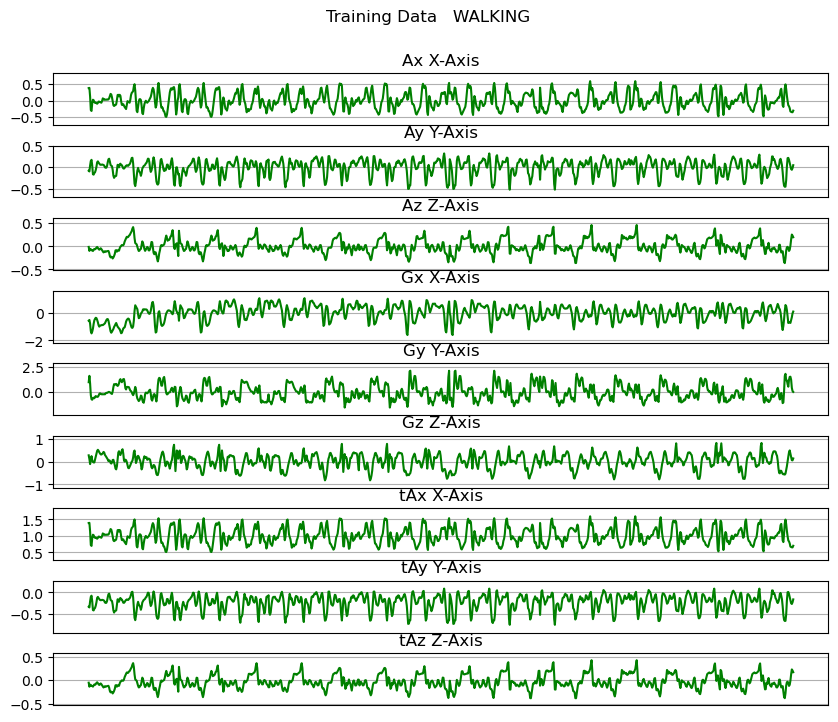

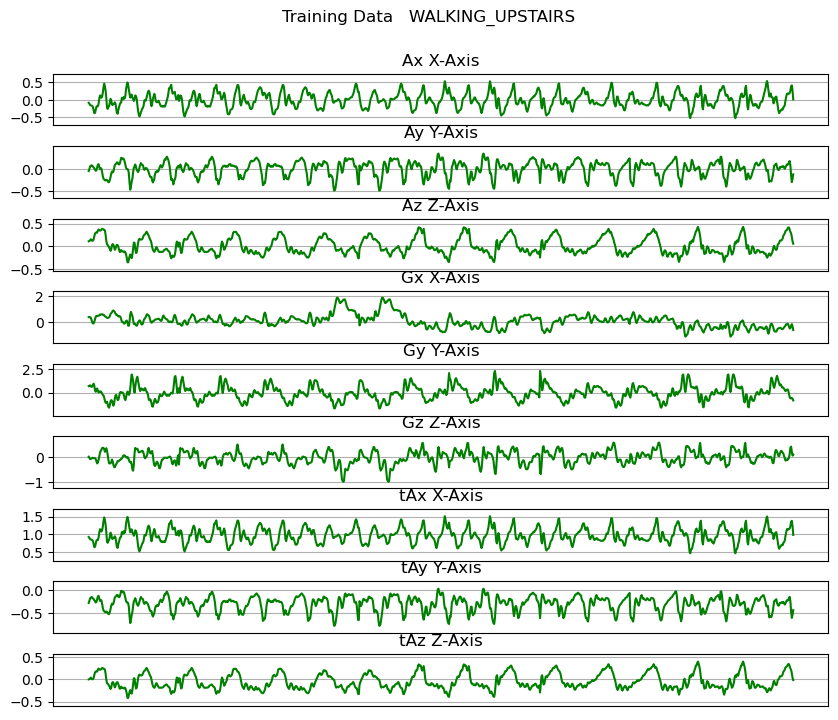

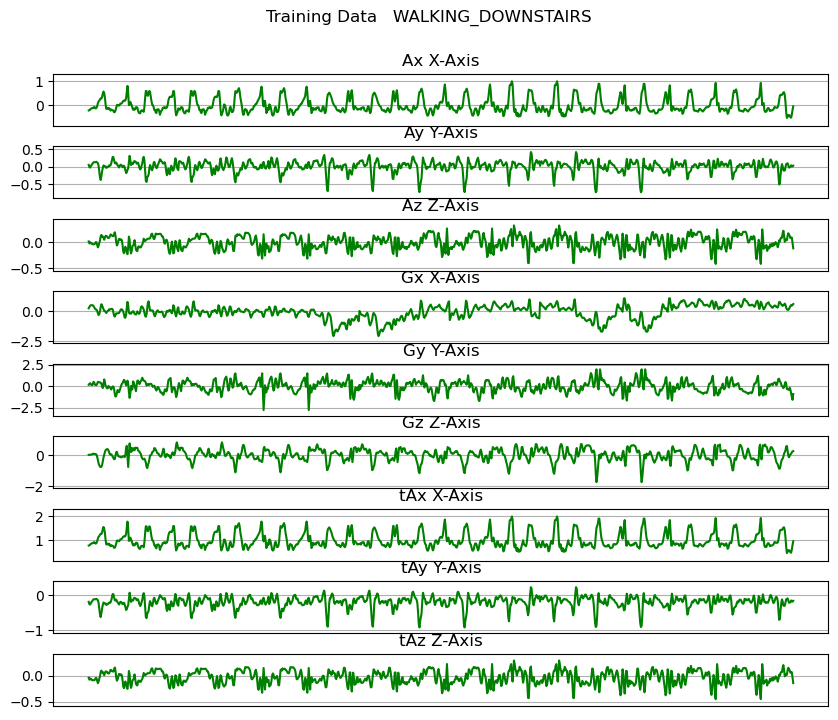

79595

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import gc

def plot_axis(ax, x, y, title):
    ax.plot(y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    #ax.set_xlim([min(x), max(x)])
    ax.grid(True)

def plot_y(y, name, data):
    fig, (Ax, Ay, Az, Gx, Gy, Gz, tAx, tAy, tAz) = plt.subplots(nrows=9, figsize=(10, 8), sharex=True)
    plot_axis(Ax, 0, data['body_acc_x_train'], 'Ax X-Axis')
    plot_axis(Ay, 0, data['body_acc_y_train'], 'Ay Y-Axis')
    plot_axis(Az, 0, data['body_acc_z_train'], 'Az Z-Axis')
    plot_axis(Gx, 0, data['body_gyro_x_train'], 'Gx X-Axis')
    plot_axis(Gy, 0, data['body_gyro_y_train'], 'Gy Y-Axis')
    plot_axis(Gz, 0, data['body_gyro_z_train'], 'Gz Z-Axis')
    plot_axis(tAx, 0, data['total_acc_x_train'], 'tAx X-Axis')
    plot_axis(tAy, 0, data['total_acc_y_train'], 'tAy Y-Axis')
    plot_axis(tAz, 0, data['total_acc_z_train'], 'tAz Z-Axis')
    #plt.title("Linear graph")
    plt.subplots_adjust(hspace=0.4)
    fig.suptitle(name+'   '+y)
    plt.subplots_adjust(top=0.90)
    #plt.tight_layout()
    plt.show()

def plot_data(data, name, step):
    print(name,'\r\n')
    ys = data['y_label'].value_counts().index
    for y in ys:
        data_for_plot = data[(data['y_label'] == y)][:step]
        plot_y(y, name, data_for_plot)
    print('\r\n')

plot_data(data_train,"Training Data", 1000)

gc.collect()

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
#from imblearn.combine import SMOTETomek

label_train = LabelEncoder()
data_train['y_label'] = label_train.fit_transform(data_train['y_label'])

print(label_train.classes_)

data_train.head()

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


,y_index_x,body_acc_x_train,body_acc_y_train,body_acc_z_train,body_gyro_x_train,body_gyro_y_train,body_gyro_z_train,total_acc_x_train,total_acc_y_train,total_acc_z_train,y_index_y,y_id,y_label
0,0,0.000181,0.010767,0.055561,0.030191,0.066014,0.022859,1.012817,-0.123217,0.102934,0,5,2
1,0,0.010139,0.006579,0.055125,0.043711,0.042699,0.010316,1.022833,-0.126876,0.105687,0,5,2
2,0,0.009276,0.008929,0.048405,0.035688,0.074850,0.013250,1.022028,-0.124004,0.102102,0,5,2
3,0,0.005066,0.007489,0.049775,0.040402,0.057320,0.017751,1.017877,-0.124928,0.106553,0,5,2
4,0,0.010810,0.006141,0.043013,0.047097,0.052343,0.002553,1.023680,-0.125767,0.102814,0,5,2


In [41]:
label_test = LabelEncoder()

data_test['y_label'] = label_test.fit_transform(data_test['y_label'])

print(label_test.classes_)

data_test.head()

['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


,y_index_x,body_acc_x_test,body_acc_y_test,body_acc_z_test,body_gyro_x_test,body_gyro_y_test,body_gyro_z_test,total_acc_x_test,total_acc_y_test,total_acc_z_test,y_index_y,y_id,y_label
0,0,0.011653,-0.029399,0.106826,0.437464,0.531349,0.136528,1.041216,-0.269796,0.023780,0,5,2
1,0,0.013109,-0.039729,0.152455,0.468264,0.721069,0.097622,1.041803,-0.280025,0.076293,0,5,2
2,0,0.011269,-0.052406,0.216846,0.498257,0.520328,0.083556,1.039086,-0.292663,0.147475,0,5,2
3,0,0.027831,-0.052106,0.202581,0.479396,0.372625,0.022861,1.054768,-0.292384,0.139906,0,5,2
4,0,0.002318,-0.045470,0.176010,0.389894,0.414541,-0.025939,1.028376,-0.285826,0.119934,0,5,2


In [42]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split

def get_frames(df, df_type, frame_size, hop_size):
    features = 9
    frames = []
    labels = []
    for i in range(0, len(df) - frame_size, hop_size):
        Ax = df['body_acc_x_'+df_type].values[i: i + frame_size]
        Ay = df['body_acc_y_'+df_type].values[i: i + frame_size]
        Az = df['body_acc_z_'+df_type].values[i: i + frame_size]
        Gx = df['body_gyro_x_'+df_type].values[i: i + frame_size]
        Gy = df['body_gyro_y_'+df_type].values[i: i + frame_size]
        Gz = df['body_gyro_z_'+df_type].values[i: i + frame_size]
        tGx = df['total_acc_x_'+df_type].values[i: i + frame_size]
        tGy = df['total_acc_y_'+df_type].values[i: i + frame_size]
        tGz = df['total_acc_z_'+df_type].values[i: i + frame_size]
        # Retrieve the most often used label in this segment
        label = stats.mode(df['y_label'][i: i + frame_size])[0][0]
        frames.append([Ax, Ay, Az, Gx, Gy, Gz, tGx, tGy, tGz])
        labels.append(label)
    # Bring the segments into a better shape
    frames = np.asarray(frames).reshape(-1, frame_size, features)
    labels = np.asarray(labels)
    return frames, labels

frame_size = 128
hop_size = 128

X, y = get_frames(data_train, 'train', frame_size, hop_size)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7)

X_test, y_test = get_frames(data_test, 'test', frame_size, hop_size)


"""
X, y = get_frames(data_train, frame_size, hop_size)

X_flat = X.reshape(-1, X.shape[1] * X.shape[2])

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X_flat,y, train_size=0.9)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print('Before Flatten:')
print(X.shape)
print(y.shape)
print('\r\nAfter Flatten:')
print(X_flat.shape)
print(y.shape)
print('\r\nTrain:')
print(X_train.shape)
print(y_train.shape)
print('\r\nValid:')
print(X_valid.shape)
print(y_valid.shape)
print('\r\nTest:')
print(X_test.shape)
print(y_test.shape)
"""

/var/folders/zz/4j96_gts1qqbmdppm1p3k4mr0000gn/T/ipykernel_1415/4066574946.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  label = stats.mode(df['y_label'][i: i + frame_size])[0][0]


"\nX, y = get_frames(data_train, frame_size, hop_size)\n\nX_flat = X.reshape(-1, X.shape[1] * X.shape[2])\n\n# In the first step we will split the data in training and remaining dataset\nX_train, X_rem, y_train, y_rem = train_test_split(X_flat,y, train_size=0.9)\n\n# Now since we want the valid and test size to be equal (10% each of overall data). \n# we have to define valid_size=0.5 (that is 50% of remaining data)\nX_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)\n\nprint('Before Flatten:')\nprint(X.shape)\nprint(y.shape)\nprint('\r\nAfter Flatten:')\nprint(X_flat.shape)\nprint(y.shape)\nprint('\r\nTrain:')\nprint(X_train.shape)\nprint(y_train.shape)\nprint('\r\nValid:')\nprint(X_valid.shape)\nprint(y_valid.shape)\nprint('\r\nTest:')\nprint(X_test.shape)\nprint(y_test.shape)\n"

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 9, 1)]       0         
                                                                 
 normalization_2 (Normalizat  (None, 128, 9, 1)        3         
 ion)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 124, 9, 16)        96        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 9, 16)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 9, 32)         2080      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 9, 32)        0   

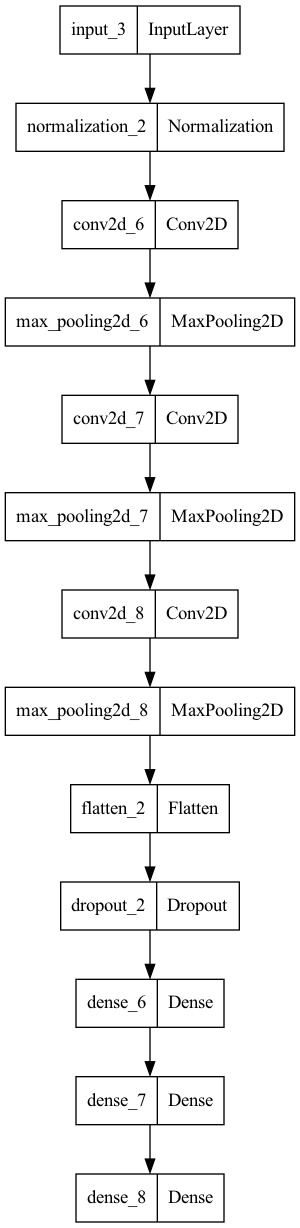

In [43]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, LSTM, TimeDistributed, Reshape, Normalization, LayerNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.utils import plot_model
from keras.optimizers import Adam, SGD

def cnn_model(X_train_shape):
    input = Input(shape=X_train_shape)
    #hidden = Reshape((128,9,1))(input)
    hidden = Normalization(axis=None)(input)
    hidden = Conv2D(filters=16, kernel_size=(5, 1), activation='relu')(hidden)
    hidden = MaxPooling2D(pool_size=(2, 1))(hidden)
    hidden = Conv2D(filters=32, kernel_size=(4, 1), activation='relu')(hidden)
    hidden = MaxPooling2D(pool_size=(2, 1))(hidden)
    hidden = Conv2D(filters=64, kernel_size=(5, 1), activation='relu')(hidden)
    hidden = MaxPooling2D(pool_size=(2, 1))(hidden)
    output = hidden
    return Model(input, output)

cnn_base = cnn_model((X_train.shape[1],X_train.shape[2],1))
cnn_base.trainable = True
cnn = Model(cnn_base.input, cnn_base.output)

input_ = cnn.input

hidden = Flatten()(cnn.output)
hidden = Dropout(0.5)(hidden)
hidden = Dense(512, activation='relu')(hidden)
hidden = Dense(32, activation='relu')(hidden)

output_ = Dense((6), activation='softmax')(hidden)

model = Model(inputs=input_, outputs=output_)

epoch_n = 85

#model.compile(optimizer=Adam(learning_rate = 0.0001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

optimizer = SGD(learning_rate = 0.01, momentum=0.9, decay=0.00001)

model.compile(optimizer=optimizer, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

print(model.summary())

plot_model(model, show_shapes=True, show_layer_names=False, to_file='model.png', dpi=72)
#Image(retina=True, filename='model.png')

plot_model(model, to_file='model.png')

In [44]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = {i : class_weights[i] for i in range(class_weights.size)}
print(class_weights)

{0: 0.8812949640287769, 1: 0.929035752979415, 2: 0.8997901364113327, 3: 0.9982537834691502, 4: 1.283682634730539, 5: 1.1150845253576074}


In [45]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=2, 
    min_delta=0.00001, 
    mode='min'
)

history = model.fit(X_train, y_train, epochs = epoch_n, batch_size=128, validation_data= (X_valid, y_valid), verbose=2, shuffle=True, class_weight = class_weights, callbacks=[custom_early_stopping])

Epoch 1/85


2023-02-27 23:32:49.359565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-27 23:32:50.552275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


41/41 - 2s - loss: 1.2843 - accuracy: 0.4521 - val_loss: 0.6272 - val_accuracy: 0.6809 - 2s/epoch - 43ms/step
Epoch 2/85
41/41 - 1s - loss: 0.6281 - accuracy: 0.7479 - val_loss: 0.6282 - val_accuracy: 0.7502 - 888ms/epoch - 22ms/step
Epoch 3/85
41/41 - 1s - loss: 0.4598 - accuracy: 0.8301 - val_loss: 0.3455 - val_accuracy: 0.8608 - 886ms/epoch - 22ms/step
Epoch 4/85
41/41 - 1s - loss: 0.3121 - accuracy: 0.8836 - val_loss: 0.2944 - val_accuracy: 0.8835 - 874ms/epoch - 21ms/step
Epoch 5/85
41/41 - 1s - loss: 0.2353 - accuracy: 0.9135 - val_loss: 0.2394 - val_accuracy: 0.8957 - 874ms/epoch - 21ms/step
Epoch 6/85
41/41 - 1s - loss: 0.2212 - accuracy: 0.9141 - val_loss: 0.2255 - val_accuracy: 0.9093 - 869ms/epoch - 21ms/step
Epoch 7/85
41/41 - 1s - loss: 0.1815 - accuracy: 0.9296 - val_loss: 0.2014 - val_accuracy: 0.9261 - 867ms/epoch - 21ms/step
Epoch 8/85
41/41 - 1s - loss: 0.1668 - accuracy: 0.9339 - val_loss: 0.1990 - val_accuracy: 0.9166 - 872ms/epoch - 21ms/step
Epoch 9/85
41/41 - 1s 

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=-1)

19/93 [=====>........................] - ETA: 0s

2023-02-27 23:32:59.775446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


93/93 [==============================] - 1s 6ms/step


In [47]:
mat = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, digits=6))

print(classification_report(y_test, y_pred, target_names=label_test.classes_, digits=6))

print("\n accuracy_score " + str(accuracy_score(y_test, y_pred)))

# print("\n precision_score binary " + str(precision_score(y_test, y_pred, average='binary')))
print("\n precision_score micro " + str(precision_score(y_test, y_pred, average='micro')))
print("\n precision_score macro " + str(precision_score(y_test, y_pred, average='macro')))
print("\n precision_score weighted " + str(precision_score(y_test, y_pred, average='weighted')))
#print("\n precision_score samples " + str(precision_score(y_test, y_pred, average='samples')))

#print("\n recall_score binary " + str(recall_score(y_test, y_pred, average='binary')))
print("\n recall_score micro " + str(recall_score(y_test, y_pred, average='micro')))
print("\n recall_score macro " + str(recall_score(y_test, y_pred, average='macro')))
print("\n recall_score weighted " + str(recall_score(y_test, y_pred, average='weighted')))
#print("\n recall_score samples " + str(recall_score(y_test, y_pred, average='samples')))

#print("\n f1_score binary " + str(f1_score(y_test, y_pred, average='binary')))
print("\n f1_score micro " + str(f1_score(y_test, y_pred, average='micro')))
print("\n f1_score macro " + str(f1_score(y_test, y_pred, average='macro')))
print("\n f1_score weighted " + str(f1_score(y_test, y_pred, average='weighted')))
#print("\n f1_score samples " + str(f1_score(y_test, y_pred, average='samples')))

print("\n\n\n" + str(mat))

cm = mat.astype('float') / mat.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=6, suppress=True)

print("\n\n\n" + str(cm))

accurancy_dict = dict(zip(label_test.classes_, cm.diagonal()))

print("\n\n\n" + str(accurancy_dict) + "\n\n\n")

              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000       537
           1   0.775093  0.849287  0.810496       491
           2   0.849894  0.755639  0.800000       532
           3   0.997732  0.887097  0.939168       496
           4   0.892950  0.814286  0.851806       420
           5   0.811847  0.991489  0.892720       470

    accuracy                       0.883910      2946
   macro avg   0.887919  0.882966  0.882365      2946
weighted avg   0.889748  0.883910  0.883814      2946

                    precision    recall  f1-score   support

            LAYING   1.000000  1.000000  1.000000       537
           SITTING   0.775093  0.849287  0.810496       491
          STANDING   0.849894  0.755639  0.800000       532
           WALKING   0.997732  0.887097  0.939168       496
WALKING_DOWNSTAIRS   0.892950  0.814286  0.851806       420
  WALKING_UPSTAIRS   0.811847  0.991489  0.892720       470

          accuracy                 

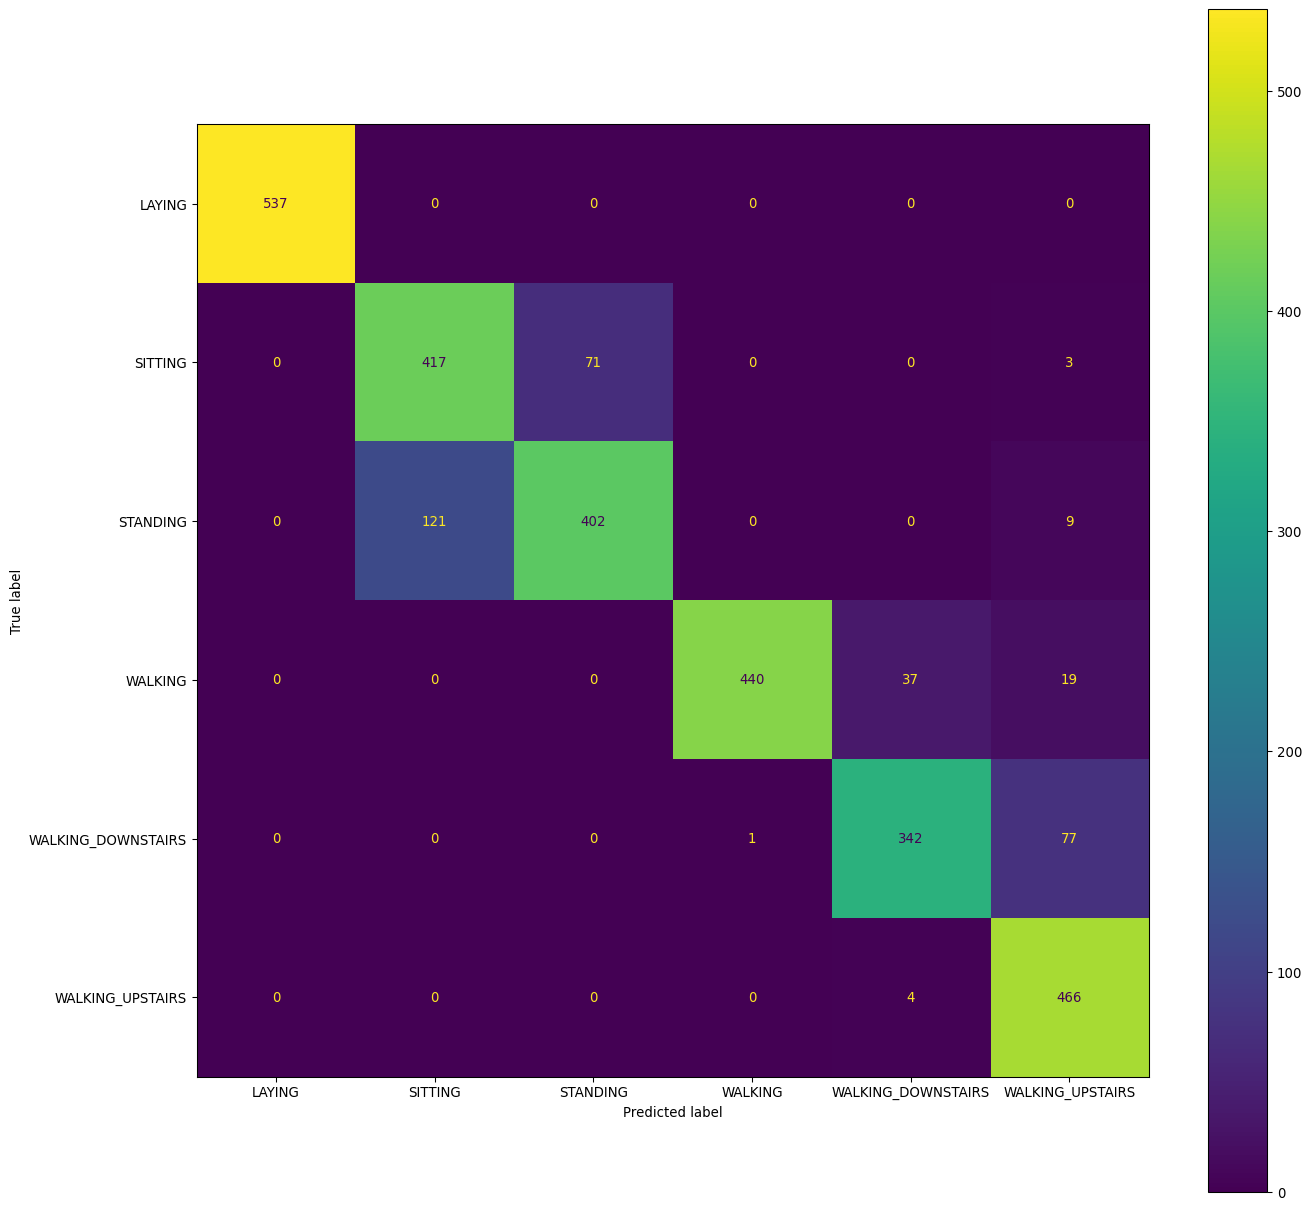

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_test.classes_,)
fig, ax = plt.subplots(figsize=(16,16), dpi=96)
disp.plot(ax=ax)
